In [1]:
import tensorflow as tf

import pandas as pd
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply, Subtract
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from scipy import signal
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import gc
from keijzer import *
from tensorflow import keras
from keras.models import Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply, Embedding, Layer, Reshape
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
#from keras.ops import convert_to_tensor, convert_to_numpy
#from keras.utils import plot_model
from keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))



def root_squared_mean_error(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))+K.mean(K.abs(y_pred - y_true))

from keras.layers.advanced_activations import PReLU

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0' # 여러개 사용시 '0,1,2' 식으로 하나의 문자열에 입력
gpus = tf.config.experimental.list_physical_devices('GPU') # 호스트 러나임에 표시되는 GPU 장치 목록 반환

if gpus: # 반환된 GPU 장치 목록이 있다면
    try: # 해당 장치에 대한 메모리 증가 활성화 여부 설정
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e: # try문 실패시에 에러문구 출력
        print(e)

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Import Data & Preprocessing

In [3]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])
dat_source

,Time-Date stamp,Date,ERCOT Load,Total Wind Output,Total Wind Installed,"Wind Output, % of Load","Wind Output, % of Installed",1-hr MW change,1-hr % change
0,01-01-2020 00:00:00,Jan-01,36823,12335,27040,33.5,45.617,NaN,NaN
1,01-01-2020 01:00:00,Jan-01,36511,13300,27040,36.4,49.187,965.4,7.826
2,01-01-2020 02:00:00,Jan-01,36022,13586,27040,37.7,50.245,286.2,2.152
3,01-01-2020 03:00:00,Jan-01,35790,14107,27040,39.4,52.171,520.9,3.834
4,01-01-2020 04:00:00,Jan-01,35642,14887,27040,41.8,55.055,779.6,5.527
...,...,...,...,...,...,...,...,...,...
35060,12-31-2023 20:00:00,Dec-31,44887,17161,38631,38.23,44.42,2858,19.99
35061,12-31-2023 21:00:00,Dec-31,44013,18301,38631,41.58,47.37,1139,6.64
35062,12-31-2023 22:00:00,Dec-31,43280,18607,38631,42.99,48.17,307,1.67
35063,12-31-2023 23:00:00,Dec-31,42319,17866,38631,42.22,46.25,-741,-3.98


### Dividing by Installed Capacity & Preprocessing

In [4]:
dat = pd.DataFrame()
dat['MW % change'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['MW % change'] = np.divide(np.array(dat['MW % change']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

dat

,MW % change,Total Wind Output
0,3.56879,0.491864
1,1.05769,0.502441
2,1.92678,0.521709
3,2.88462,0.550555
4,-0.580621,0.544749
...,...,...
35059,7.3982,0.444229
35060,2.951,0.473739
35061,0.79211,0.48166
35062,-1.91815,0.462478


In [5]:
ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)
wind_df

,Year,MW % change,Total Wind Output
0,2020,3.56879,0.491864
1,2020,1.05769,0.502441
2,2020,1.92678,0.521709
3,2020,2.88462,0.550555
4,2020,-0.580621,0.544749
...,...,...,...
35059,2023,7.3982,0.444229
35060,2023,2.951,0.473739
35061,2023,0.79211,0.48166
35062,2023,-1.91815,0.462478


In [6]:
wind_df = wind_df.reset_index(drop=True)
std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['MW % change']] = std_scaler_ramp.fit_transform(wind_df[['MW % change']])
#wind_df[['Wind Change, % of Load', 'Wind Change']] = std_scaler_ramp.fit_transform(wind_df[['Wind Change, % of Load', 'Wind Change']])
wind_df = wind_df.iloc[:-1,:]
wind_df

,Year,MW % change,Total Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


In [7]:
ramp_df = pd.DataFrame(wind_df)
ramp_df.columns=['Year', 'Wind Change', 'Wind Output']
ramp_df

,Year,Wind Change,Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


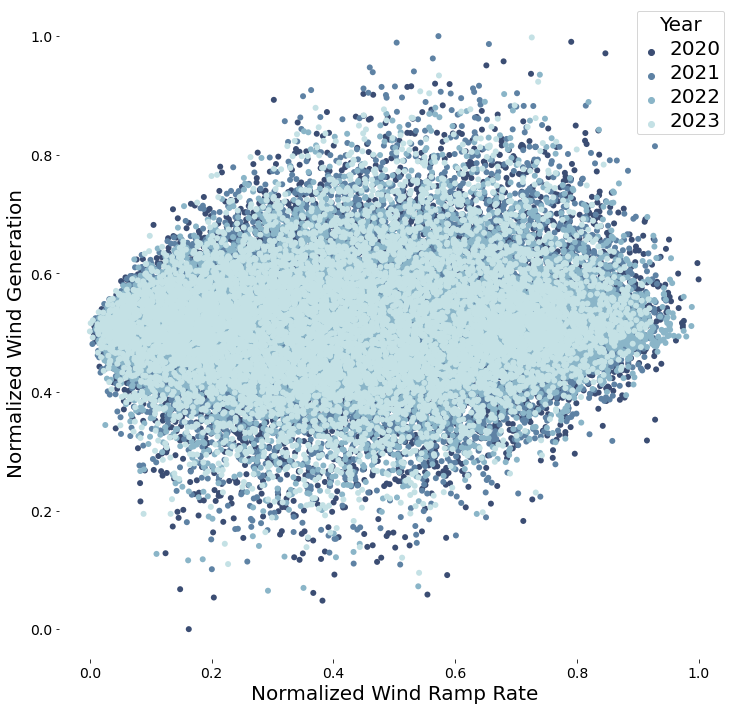

In [8]:
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=ramp_df, x="Wind Output", y="Wind Change", hue='Year',
                palette="ch:r=-.2,d=.3_r", linewidth=0, ax=ax)
#plt.axvline(x=u_ramp, color='r', linewidth=1)
#plt.axvline(x=l_ramp, color='r', linewidth=1)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend(labels=['2020','2021','2022','2023'], loc="upper right", fontsize=20)
plt.setp(ax.get_legend().get_title(), fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20)
plt.xlabel('Normalized Wind Ramp Rate', fontsize=20)
plt.ylabel('Normalized Wind Generation', fontsize=20)

plt.savefig('Normalized Scatter_Wind.png', dpi=500)

## Wind Ramp Rate Forecasting

### SVD-based Feature Generation

In [9]:
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import gc

def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

In [10]:
norm_df = np.array(wind_df['Wind Change']).reshape(-1,1)
timesteps = 24*7
output_timesteps = 24
num_features = 1
X, Y = create_dataset(norm_df, timesteps, output_timesteps)
b_size = timesteps

In [11]:
dec_num = timesteps
high_ind = 35

addX = np.zeros((X.shape[0], dec_num, high_ind+1))

def svdadd(X, start, end, b_size):
    dec_x = X[start:end, :, :]
    U, S, Vh = svd(dec_x.reshape(b_size, -1))

    high_sig = np.matmul(np.matmul(U[:,:high_ind], np.diag(S[0:high_ind])), Vh[:high_ind,:])
    low_sig = X[:dec_num, :, :].reshape(b_size,-1)-high_sig

    rec_x = np.zeros((b_size, b_size, high_ind))
    #print(sum(S[0:high_ind])/sum(S))
    for i in range(high_ind):
        rec_x[:,:,i] = np.matmul((U[:,i]*S[i]).reshape(-1,1), Vh[i,:].reshape(1,-1))    
    return rec_x, low_sig

for k in range(X.shape[0]//dec_num):
    rec_x, low_sig = svdadd(X, k*dec_num, (k+1)*dec_num, b_size)
    addX[k*dec_num:k*dec_num+dec_num,:, :-1] = rec_x
    addX[k*dec_num:k*dec_num+dec_num,:, -1] = low_sig
    
rec_x, low_sig = svdadd(X, X.shape[0]-dec_num, X.shape[0], b_size)
addX[X.shape[0]-dec_num:X.shape[0], :, :-1] = rec_x
addX[X.shape[0]-dec_num:X.shape[0],:, -1] = low_sig

addX_det = addX[:, :, :-1]
addX_det = np.sum(addX_det, axis=2)
X = np.concatenate([X, addX], axis=2)
num_features = X.shape[2]

### Training/Test Set Division & Shuffled Learning

In [12]:
trvaX, teX, trvaY, teY = train_test_split(X, Y, test_size=0.1, shuffle=False)

idx = np.arange(trvaX.shape[0])
np.random.shuffle(idx)
strvaX = trvaX[idx]
strvaY = trvaY[idx]
strvaY = strvaY.reshape(-1, output_timesteps)

trvaY = trvaY.reshape(-1, output_timesteps)
teY = teY.reshape(-1, output_timesteps)

trvaX.shape, trvaY.shape, teX.shape, teY.shape

((31383, 168, 37), (31383, 24), (3487, 168, 37), (3487, 24))

## Wind Ramp Rate Forecasting Basic Model

In [13]:
def MAEMD(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

In [14]:
from keras.layers.advanced_activations import PReLU

In [15]:
from keras import regularizers

num_features = trvaX.shape[2]
output_timesteps = trvaY.shape[1]

with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1
    beta = 1
    hfilters = 168
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1 = Input(shape=(timesteps, num_features))
   
    ## Attention Block
    pera = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(pera)
    den1b = Dense(timesteps, activation='sigmoid')(pera)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])   
    
    ## Permuted Attention Block
    per1 = Permute((2,1))(visible1)
    den2a = Dense(num_features, activation='tanh')(visible1)
    den2b = Dense(num_features, activation='sigmoid')(visible1)
    den2 = Multiply()([den2a, den2b])
    perb2 = Permute((2,1), name='attention_vec2')(den2)
    
    mul2 = Multiply()([per1, perb2])     
    
    ## Parallel DCCNN Blocks 1-1 ~ 3-1
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    rres01a = Add()([mul1, d1])   # (100, 25) (100, 25)
    rres01b = Subtract()([mul1, d1])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(rres01a)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    
    d1 = Multiply()([d1a, d1b])
    rres02a = Add()([rres01a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(rres01b) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    rres02b = Subtract()([rres01b, d2])   # (100, 25) (100, 25) 
    rres02 = Concatenate()([rres02a, rres02b, rres01a, rres01b])
    #rres02 = Dropout(0.2)(rres02)
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(rres02)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    rres03a = Add()([rres02a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(rres02) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    rres03b = Subtract()([rres02b, d2])
    rres03 = Concatenate()([rres03a, rres03b, rres02])
    
    rres10 = Concatenate()([rres02, rres03])
    
    
    ## Right-half DCCNN Blocks 1-2 ~ 3-2
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul2)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res01a = Add()([mul2, d1])   # (100, 25) (100, 25)
    res01b = Subtract()([mul2, d1])
    
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01a)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    
    d1 = Multiply()([d1a, d1b])
    res02a = Add()([res01a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01b) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res02b = Subtract()([res01b, d2])   # (100, 25) (100, 25) 
    res02 = Concatenate()([res02a, res02b, res01a, res01b])
    #res02 = Dropout(0.2)(res02)
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res03a = Add()([res02a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res03b = Subtract()([res02b, d2])
    res03 = Concatenate()([res03a, res03b, res02])
    
    res10 = Concatenate()([res02, res03])
    print(rres10.shape)
    
    ## Output Blocks
    out1 = Conv1D(24*7, 1, padding='same', activation=PReLU())(res10)   # 256, 11X10=110
    out1 = Dropout(0.2)(out1)  
    
    out2 = Conv1D(24*7, 1, padding='same', activation=PReLU())(rres10)   # 256, 11X10=110
    out2 = Dropout(0.2)(out2)
    
    out = Concatenate(axis=1)([out1, out2])
    
    ## Output Block
    out = Conv1D(24*7, 1, padding='same', activation=PReLU())(out) # 512,  110X5=550
    out = Dropout(0.2)(out)

    #, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
    out = GlobalAveragePooling1D()(out) 

    out = Dense(output_timesteps)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())

(None, 168, 370)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 168, 37)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 37, 168)      0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 168, 37)      1406        input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 168, 37)      1406        input_1[0][0]                    
_____________________________________________________________________________

In [16]:
gc.collect()

610

In [17]:
    model.compile(loss=MAEMD, optimizer='adam', metrics=['mse','mae', MAEMD])
    early_stopping =EarlyStopping(monitor='val_loss', patience=50)
    batch_size = 100
    epochs = 1000
    #root_squared_mean_error
    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

In [22]:
    %%time
    b_size = 168
    #hist = model.fit(strvaX, strvaY, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(teX, teY), callbacks=[history, early_stopping])  # , checkpoint
    hist = model.fit(strvaX, strvaY, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(teX, teY), callbacks=[history, early_stopping])  # , checkpoint

Epoch 1/1000
187/187 [==============================] - 17s 89ms/step - loss: 0.1863 - mse: 0.0155 - mae: 0.0958 - MAEMD: 0.1863 - val_loss: 0.1164 - val_mse: 0.0145 - val_mae: 0.0958 - val_MAEMD: 0.1180
Epoch 2/1000
187/187 [==============================] - 15s 80ms/step - loss: 0.1381 - mse: 0.0172 - mae: 0.1048 - MAEMD: 0.1381 - val_loss: 0.1020 - val_mse: 0.0156 - val_mae: 0.1010 - val_MAEMD: 0.1037
Epoch 3/1000
187/187 [==============================] - 15s 80ms/step - loss: 0.1306 - mse: 0.0173 - mae: 0.1054 - MAEMD: 0.1306 - val_loss: 0.1001 - val_mse: 0.0148 - val_mae: 0.0983 - val_MAEMD: 0.1017
Epoch 4/1000
187/187 [==============================] - 15s 80ms/step - loss: 0.1272 - mse: 0.0169 - mae: 0.1039 - MAEMD: 0.1272 - val_loss: 0.0973 - val_mse: 0.0146 - val_mae: 0.0969 - val_MAEMD: 0.0989
Epoch 5/1000
187/187 [==============================] - 15s 80ms/step - loss: 0.1237 - mse: 0.0163 - mae: 0.1015 - MAEMD: 0.1237 - val_loss: 0.0939 - val_mse: 0.0141 - val_mae: 0.0949 

### Saving Basic Model Training Results

In [56]:
model.save('Basic Ramp Model Final.h5')

In [20]:
gc.collect()

11

In [21]:
loss_history = hist.history['loss']
valloss_history = hist.history['val_loss']

NameError: name 'hist' is not defined

In [ ]:
np.savetxt('ramp_losshistory.txt',(loss_history,valloss_history))

In [ ]:
with tf.device('/gpu:0'):
    model = keras.models.load_model('Basic Ramp Model Final.h5', custom_objects={'MAEMD': MAEMD})
    gc.collect()

In [ ]:
layer_name = 'attention_vec'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(strvaX)

In [ ]:
avg_int_output = np.mean(intermediate_output, axis=0)
avg_int_output.shape

In [ ]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.transpose(abs(avg_int_output)), cmap="rocket")
lx = ax.set_xticklabels([])
ly = ax.set_yticklabels([])
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=14)

f.savefig('ramp_attention_output.png', dpi=1000, bbox_inches="tight")
#f.savefig('ramp_attention_output.eps', dpi=1000, bbox_inches="tight")

In [ ]:
plt.cla()   # clear the current axes
plt.clf()   # clear the current figure
plt.close() #

In [ ]:
layer_name = 'multiply_143'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(strvaX)
avg_int_output = np.mean(intermediate_output, axis=0)
avg_int_output.shape

In [ ]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(np.transpose(abs(avg_int_output)), cmap="rocket")
sns.heatmap((abs(avg_int_output)), cmap="rocket")
lx = ax.set_xticklabels([])
ly = ax.set_yticklabels([])
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=14)

f.savefig('ramp_attention_output2.png', dpi=1000, bbox_inches="tight")
#f.savefig('ramp_attention_output.eps', dpi=1000, bbox_inches="tight")

In [ ]:
plt.cla()   # clear the current axes
plt.clf()   # clear the current figure
plt.close() #

## Basic Model Test Results

In [23]:
batch_size = 168

testPredict = model.predict(teX, batch_size=batch_size)

In [24]:
def npMAEMS(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true))*100
def npMAEMD(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true-np.mean(y_true)))*100
def npMSE(y_true, y_pred):
    return np.mean(np.square(-y_true+y_pred))
def npMAE(y_true, y_pred):
    return np.mean(abs(-y_true+y_pred))

In [29]:
tePredict = testPredict.reshape(-1)
testY = teY.reshape(-1)
print('Error Test Score > MSE == ', npMSE(testY, tePredict), ' MAE == ', npMAE(testY, tePredict), ' MAEMS == ', npMAEMD(testY, tePredict))

Error Test Score > MSE ==  0.010458449654374345  MAE ==  0.08061044844539078  MAEMS ==  0.09455875588227217


## Wind Ramp Rate FFEL Model

In [26]:
trX, vaX, trY, vaY = train_test_split(trvaX, trvaY, test_size=1/6, shuffle=False)
trY = trY.reshape(-1,output_timesteps)
vaY = vaY.reshape(-1,output_timesteps)

In [27]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)

In [28]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr, e_va])
prediction = np.vstack([trainPredict, validPredict])
print(errors.shape)
print(prediction.shape)

(31383, 24)
(31383, 24)


In [30]:
norm_df2 = pd.DataFrame(norm_df).iloc[:prediction.shape[0], :]
norm_df2.columns = ['Normalized Ramp']
norm_df2.head()

,Normalized Ramp
0,0.620197
1,0.544580
2,0.570751
3,0.599594
4,0.495246


In [31]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,...,Prediction15,Prediction16,Prediction17,Prediction18,Prediction19,Prediction20,Prediction21,Prediction22,Prediction23,Prediction24
0,0.340904,0.388351,0.484275,0.507197,0.484133,0.472864,0.535125,0.425535,0.340610,0.425485,...,0.433793,0.387936,0.340157,0.398664,0.586338,0.668183,0.652024,0.601184,0.547114,0.516575
1,0.382628,0.461638,0.454923,0.442306,0.489201,0.528980,0.414674,0.298369,0.339609,0.501212,...,0.471597,0.436860,0.466730,0.605467,0.682793,0.672481,0.622956,0.539815,0.449719,0.412256
2,0.484009,0.467362,0.459112,0.462968,0.511037,0.448449,0.384666,0.404945,0.519481,0.533361,...,0.347213,0.357349,0.463105,0.569255,0.580560,0.588779,0.577018,0.466100,0.409687,0.444941
3,0.438301,0.464415,0.498009,0.498221,0.437968,0.391106,0.448353,0.572494,0.571333,0.523891,...,0.447634,0.523665,0.533529,0.509282,0.474265,0.488132,0.489148,0.437093,0.443762,0.443018
4,0.471208,0.521434,0.569168,0.494163,0.427493,0.491845,0.648706,0.617925,0.544643,0.487646,...,0.619282,0.657241,0.589175,0.565798,0.487770,0.393522,0.351331,0.370632,0.450994,0.450656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31378,0.319131,0.359100,0.421904,0.469876,0.517051,0.496686,0.573264,0.614522,0.619289,0.629096,...,0.390228,0.488077,0.556945,0.535046,0.519070,0.461985,0.403619,0.329410,0.324648,0.288786
31379,0.315480,0.393354,0.427845,0.436706,0.516565,0.575576,0.623721,0.626198,0.624842,0.677108,...,0.361794,0.440229,0.444146,0.451656,0.459679,0.401886,0.346548,0.463026,0.395202,0.293582
31380,0.391865,0.525236,0.581785,0.604298,0.626868,0.581513,0.593250,0.618675,0.712894,0.660173,...,0.420994,0.423375,0.426404,0.408006,0.361379,0.362715,0.400431,0.396513,0.349068,0.394819
31381,0.393860,0.516164,0.623814,0.665296,0.655433,0.601193,0.586542,0.640437,0.614383,0.512483,...,0.489526,0.486219,0.448366,0.378182,0.346465,0.427175,0.374210,0.278360,0.320401,0.468347


In [32]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,-0.167483,-0.165249,0.010856,0.023979,0.053478,-0.032961,-0.113581,-0.138200,-0.049508,-0.107624,...,-0.094083,-0.159094,-0.181260,-0.142352,0.008682,0.146321,0.099092,0.059722,0.099644,0.126101
1,-0.170973,-0.011781,-0.028295,0.011652,-0.016625,-0.119726,-0.149061,-0.091749,-0.193500,-0.201394,...,-0.075434,-0.084556,-0.074287,0.027811,0.160931,0.119549,0.081494,0.092345,0.059245,-0.062338
2,0.010591,-0.015857,0.028458,-0.042858,-0.137669,-0.115286,-0.005452,-0.128165,-0.183126,0.037336,...,-0.174204,-0.183668,-0.114550,0.047393,0.027628,0.047317,0.129548,0.075626,-0.064908,-0.018047
3,-0.044918,0.033761,-0.007816,-0.150485,-0.125766,0.000989,-0.084756,-0.130113,0.075308,0.012608,...,-0.093383,-0.053991,0.011667,-0.043651,-0.067197,0.040662,0.098674,-0.037501,-0.019225,-0.040861
4,0.040553,0.015608,-0.079538,-0.069572,0.037375,-0.041264,-0.053901,0.121899,0.033360,-0.041009,...,0.041627,0.135379,0.036243,0.024336,0.040300,0.003048,-0.123263,-0.092356,-0.032886,-0.022502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31378,0.012530,-0.025348,0.028344,-0.004969,-0.010865,-0.060403,-0.055039,-0.033763,-0.039386,-0.040929,...,0.096975,0.052795,-0.150804,-0.051455,0.074197,-0.039396,-0.146276,-0.107950,-0.162506,-0.064252
31379,-0.068969,-0.000206,-0.047001,-0.091210,-0.040524,-0.052727,-0.024564,-0.032477,-0.045182,-0.005464,...,-0.073488,-0.267521,-0.142356,0.006783,-0.041701,-0.148009,-0.090812,-0.024128,0.042165,-0.036437
31380,-0.001696,0.050391,0.053869,0.047209,-0.001436,-0.066771,-0.065425,-0.051350,0.030321,0.055927,...,-0.286755,-0.163127,-0.018469,-0.093375,-0.188517,-0.074644,-0.086723,0.043475,0.019049,0.013008
31381,-0.080985,-0.011752,0.066725,0.036993,0.007148,-0.057481,-0.083482,-0.042136,0.010138,0.032283,...,-0.096975,0.041346,-0.053014,-0.171714,-0.090895,-0.059979,0.021173,-0.051659,-0.061410,0.029708


In [33]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Normalized Ramp,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,0.620197,0.340904,0.388351,0.484275,0.507197,0.484133,0.472864,0.535125,0.425535,0.340610,...,-0.094083,-0.159094,-0.181260,-0.142352,0.008682,0.146321,0.099092,0.059722,0.099644,0.126101
1,0.544580,0.382628,0.461638,0.454923,0.442306,0.489201,0.528980,0.414674,0.298369,0.339609,...,-0.075434,-0.084556,-0.074287,0.027811,0.160931,0.119549,0.081494,0.092345,0.059245,-0.062338
2,0.570751,0.484009,0.467362,0.459112,0.462968,0.511037,0.448449,0.384666,0.404945,0.519481,...,-0.174204,-0.183668,-0.114550,0.047393,0.027628,0.047317,0.129548,0.075626,-0.064908,-0.018047
3,0.599594,0.438301,0.464415,0.498009,0.498221,0.437968,0.391106,0.448353,0.572494,0.571333,...,-0.093383,-0.053991,0.011667,-0.043651,-0.067197,0.040662,0.098674,-0.037501,-0.019225,-0.040861
4,0.495246,0.471208,0.521434,0.569168,0.494163,0.427493,0.491845,0.648706,0.617925,0.544643,...,0.041627,0.135379,0.036243,0.024336,0.040300,0.003048,-0.123263,-0.092356,-0.032886,-0.022502


In [34]:
norm_df22 = pd.DataFrame(norm_df).iloc[prediction.shape[0]+timesteps:, :]
norm_df22.columns = ['Normalized Wind']
npnorm22 = np.array(norm_df22)

In [35]:
pr_df = pd.DataFrame(tePredict.reshape(-1,24))
pr_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.567820,0.604065,0.604990,0.622705,0.675015,0.733476,0.690205,0.583743,0.491780,0.391010,...,0.460265,0.381884,0.325984,0.396202,0.368869,0.299714,0.332002,0.444955,0.502887,0.536291
1,0.536774,0.582916,0.622584,0.705115,0.811317,0.778512,0.677372,0.527180,0.461785,0.417538,...,0.366910,0.345179,0.469990,0.378682,0.266804,0.304603,0.499117,0.569222,0.586991,0.568906
2,0.617531,0.656789,0.692688,0.812093,0.830454,0.701891,0.597114,0.477775,0.417684,0.368707,...,0.398067,0.430152,0.332761,0.242805,0.278021,0.407418,0.549251,0.606971,0.623375,0.614693
3,0.643302,0.666723,0.754029,0.809621,0.716478,0.589066,0.481037,0.383848,0.334401,0.302142,...,0.528435,0.406721,0.226576,0.239068,0.393552,0.502153,0.561113,0.634862,0.675770,0.682906
4,0.659256,0.746299,0.749841,0.691594,0.615671,0.533024,0.461339,0.359516,0.361168,0.385139,...,0.354202,0.248570,0.268468,0.410366,0.526183,0.541140,0.546258,0.582404,0.600861,0.606113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,0.553488,0.622127,0.674782,0.648752,0.566170,0.504208,0.485852,0.425042,0.359625,0.357211,...,0.416201,0.449662,0.465317,0.503195,0.541112,0.590393,0.579760,0.550423,0.545631,0.537363
3483,0.771465,0.725196,0.613201,0.522928,0.453261,0.413491,0.371041,0.278616,0.290476,0.343437,...,0.369490,0.363314,0.429094,0.538031,0.558495,0.568606,0.584088,0.567864,0.551705,0.600779
3484,0.758591,0.554486,0.485413,0.469867,0.457019,0.379397,0.358004,0.320799,0.380113,0.409429,...,0.318343,0.370210,0.425691,0.484445,0.482526,0.528846,0.563815,0.552152,0.584039,0.750242
3485,0.677255,0.504433,0.448499,0.403457,0.339989,0.269179,0.308619,0.308922,0.312834,0.354586,...,0.443300,0.511129,0.513032,0.519867,0.483847,0.462129,0.467389,0.475313,0.563422,0.645265


In [36]:
teY = testY.reshape(-1,24)
e_te = testPredict-teY
er_df = pd.DataFrame(e_te, columns=Erindex)
er_df

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,0.010731,-0.024238,-0.043295,-0.035970,0.004990,0.050903,0.085960,0.103543,0.150971,0.097757,...,-0.041115,-0.168012,-0.111375,-0.090952,0.015831,-0.030305,-0.049809,0.006316,-0.040614,-0.006810
1,-0.091529,-0.065369,-0.036091,0.035090,0.128745,0.174266,0.197172,0.186371,0.168532,-0.017744,...,-0.182985,-0.092181,-0.017163,0.025644,-0.063215,-0.077208,0.060479,0.025721,0.043889,0.000947
2,-0.030754,-0.001886,0.022663,0.129520,0.226209,0.221691,0.256305,0.184522,-0.017597,-0.339043,...,-0.039293,-0.057002,-0.020277,-0.087214,-0.103790,-0.031221,0.005749,0.063869,0.055416,-0.036949
3,-0.015373,-0.003302,0.071456,0.205375,0.236278,0.248257,0.187784,-0.051433,-0.373348,-0.284359,...,0.041282,0.053683,-0.103443,-0.142743,-0.045087,-0.041348,0.018011,0.066903,0.024128,0.062835
4,-0.010768,0.063726,0.145596,0.211393,0.274862,0.239771,0.026058,-0.348234,-0.225334,-0.059734,...,0.001164,-0.081449,-0.113343,-0.028272,-0.017319,-0.001962,-0.021701,-0.069237,-0.019209,0.022888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,-0.056835,-0.224152,-0.187710,-0.147561,-0.174019,-0.120459,-0.077702,-0.048011,-0.075856,-0.064161,...,0.060618,0.025483,0.250279,0.045810,-0.054012,0.116716,0.104290,0.010411,-0.007400,-0.043808
3483,-0.074814,-0.137297,-0.183112,-0.217260,-0.171405,-0.150063,-0.102012,-0.156866,-0.130897,-0.095162,...,-0.054688,0.148276,-0.028291,-0.057092,0.084818,0.093136,0.044076,0.014834,-0.029465,0.019920
3484,-0.103901,-0.241827,-0.254776,-0.154800,-0.106535,-0.093656,-0.077477,-0.100573,-0.058486,0.004816,...,0.103305,-0.087176,-0.169433,0.010768,0.007056,-0.011167,0.010785,-0.029019,0.003180,-0.024400
3485,-0.119058,-0.235755,-0.176167,-0.160097,-0.133065,-0.166303,-0.112753,-0.129677,-0.091779,-0.052911,...,-0.014085,-0.083994,0.039355,0.044398,-0.056165,-0.090901,-0.113781,-0.105545,-0.211221,-0.090247


In [37]:
prnorm = np.array(pr_df)
ernorm =np.array(er_df)
print(ernorm.shape)

(3487, 24)


In [38]:
etedat = np.concatenate((npnorm22[:prnorm.shape[0],:], prnorm, ernorm), axis=1)
etedat[169:171,:]

array([[ 6.18711954e-01,  6.31689668e-01,  6.62143111e-01,
         6.40329361e-01,  6.21738851e-01,  6.26016617e-01,
         5.83752692e-01,  5.04758656e-01,  4.15203571e-01,
         3.51986825e-01,  3.35670024e-01,  3.60822260e-01,
         3.67010951e-01,  3.68791580e-01,  3.67803991e-01,
         3.99904728e-01,  4.25000012e-01,  5.10966957e-01,
         4.73859549e-01,  3.72748673e-01,  3.29700828e-01,
         4.29570585e-01,  4.86741245e-01,  4.80019927e-01,
         4.83672231e-01,  1.29777136e-02,  2.96838749e-02,
         4.31175169e-02,  1.99724930e-01,  2.24623619e-01,
         1.50788900e-01,  7.78692452e-02, -1.43233995e-02,
        -6.40326413e-02, -8.58643407e-02, -6.73459674e-02,
        -4.14155400e-02, -6.64101409e-02, -7.69888574e-02,
        -6.04737019e-02,  6.98239369e-03, -6.06685483e-02,
        -1.84093791e-02, -4.57485016e-02, -1.27480560e-01,
        -5.80626307e-02, -3.63791419e-02, -6.42009394e-02,
        -1.05307228e-01],
       [ 6.32459236e-01,  6.11

In [39]:
etedat.shape

(3487, 49)

In [40]:
output_timesteps = 1
eteX, eteY = create_dataset(etedat, timesteps, output_timesteps)
eteY.shape

(3317, 1, 49)

In [41]:
eteY = eteY[:,:,-24:].reshape(-1,24)

In [42]:
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps)
Ye.shape

(31213, 1, 49)

In [43]:
Ye = Ye[:,:,-24:].reshape(-1,24)
print(Xe.shape)
print(Ye.shape)

(31213, 168, 49)
(31213, 24)


In [44]:
gc.collect()

13149

In [45]:
idx = np.arange(Xe.shape[0])
np.random.shuffle(idx)
Xe = Xe[idx]
Ye = Ye[idx]

In [46]:
eteX.shape, eteY.shape, Xe.shape, Ye.shape

((3317, 168, 49), (3317, 24), (31213, 168, 49), (31213, 24))

In [47]:
def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))*10+K.mean(K.abs(y_pred - y_true))

In [48]:
num_features = Xe.shape[2]

with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1
    hfilters = 256
    hkernel_size1 = 1
    hkernel_size2 = 2
    visible1e = Input(shape=(timesteps, num_features))
   
    per1e = Permute((2,1))(visible1e)
    den1ae = Dense(timesteps, activation='tanh')(per1e)
    den1be = Dense(timesteps, activation='sigmoid')(per1e)
    den1e = Multiply()([den1ae, den1be])
    per2e = Permute((2,1), name='attention_vec')(den1e)
    mul1e = Multiply()([visible1e, per2e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res01ae = Add()([visible1e, d1e])   # (100, 25) (100, 25)
    res01be = Subtract()([visible1e, d1e])

    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01ae)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    
    d1e = Multiply()([d1ae, d1be])
    res02ae = Add()([res01ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01be) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res02be = Subtract()([res01be, d2e])   # (100, 25) (100, 25) 
    res02e = Concatenate()([res02ae, res02be, res01ae, res01be])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res03ae = Add()([res02ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res03be = Subtract()([res02be, d2e])   # (100, 25) (100, 25)
    res03e = Concatenate()([res03ae, res03be, res02e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    res04ae = Add()([res03ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res04be = Subtract()([res02be, d2e])   # (100, 25) (100, 25)
    res04e = Concatenate()([res04ae, res04be, res03e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res05ae = Add()([res04ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res05be = Subtract()([res04be, d2e])   # (100, 25) (100, 25)
    res05e = Concatenate()([res05ae, res05be, res04e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])

    res06ae = Add()([res05ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])

    res06be = Subtract()([res05be, d2e])   # (100, 25) (100, 25)
    res06e = Concatenate()([res05ae, res05be])
    
    res10e = Concatenate()([res02e, res03e, res04e, res05e, res06e])   # 
    
    #print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(720, 1, padding='same', activation=PReLU())(res10e)   # 256, 11X10=110
    oute = Dropout(0.2)(oute)   #SpatialDropout1D
    
    oute = Conv1D(360, 1, padding='same', activation=PReLU())(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(24)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=mse_mae, optimizer='adam', metrics=['mse','mae','mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=50)
    batch_size = 168
    epochs = 1000

    history_e = LossHistory()
    history_e.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 168, 49)]    0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 49, 168)      0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 49, 168)      28392       permute_2[0][0]                  
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 49, 168)      28392       permute_2[0][0]                  
____________________________________________________________________________________________

In [49]:
gc.collect()

2538

In [50]:
# %%time
    histe = modele.fit(Xe, Ye, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(eteX, eteY), callbacks=[history_e, early_stopping])  # , checkpoint

Epoch 1/1000
186/186 [==============================] - 30s 146ms/step - loss: 0.1788 - mse: 0.0110 - mae: 0.0685 - mape: 503.3210 - val_loss: 0.1625 - val_mse: 0.0089 - val_mae: 0.0738 - val_mape: 298.8388
Epoch 2/1000
186/186 [==============================] - 26s 139ms/step - loss: 0.1097 - mse: 0.0053 - mae: 0.0566 - mape: 458.6915 - val_loss: 0.1328 - val_mse: 0.0068 - val_mae: 0.0648 - val_mape: 345.8992
Epoch 3/1000
186/186 [==============================] - 26s 138ms/step - loss: 0.0985 - mse: 0.0046 - mae: 0.0527 - mape: 493.3035 - val_loss: 0.1073 - val_mse: 0.0051 - val_mae: 0.0560 - val_mape: 334.5392
Epoch 4/1000
186/186 [==============================] - 25s 137ms/step - loss: 0.0837 - mse: 0.0037 - mae: 0.0470 - mape: 485.9990 - val_loss: 0.0848 - val_mse: 0.0037 - val_mae: 0.0477 - val_mape: 285.8456
Epoch 5/1000
186/186 [==============================] - 25s 136ms/step - loss: 0.0708 - mse: 0.0029 - mae: 0.0419 - mape: 477.8738 - val_loss: 0.0763 - val_mse: 0.0032 - va

### Saving FFEL Model Training Results

In [ ]:
eloss_history = histe.history['loss']
valeloss_history = histe.history['val_loss']

In [ ]:
np.savetxt('ramp_elosshistory.txt',(eloss_history, valeloss_history))

In [57]:
modele.save('Error Learning Ramp Model.h5')

In [ ]:
gc.collect()

## FFEL Model Test Results

In [51]:
batch_size = 168
trainePredict = modele.predict(Xe, batch_size=batch_size)
etePredict = modele.predict(eteX, batch_size=batch_size)

In [52]:
trePredict = trainePredict.reshape([-1])
trainYe = Ye.reshape([-1])

print('Error Training Score > MSE == ', (np.mean(np.square(trainYe-trePredict))), ' MAE == ', mean_absolute_error(trainYe,trePredict), ' RMSE == ', np.sqrt(np.mean(np.square(trainYe-trePredict))))

Error Training Score > MSE ==  0.0008442379634941858  MAE ==  0.022475184514432377  RMSE ==  0.02905577332466279


In [53]:
etestPredict = etePredict.reshape([-1])
testYe = eteY.reshape([-1])

print('Error Training Score > MSE == ', (np.mean(np.square(testYe-etestPredict))), ' MAE == ', mean_absolute_error(testYe,etestPredict), ' RMSE == ', np.sqrt(np.mean(np.square(testYe-etestPredict))))

Error Training Score > MSE ==  0.0034938689323503157  MAE ==  0.04605162284751499  RMSE ==  0.059108958139611256


## Final Prediction Results

In [54]:
testPredict = tePredict.reshape(-1,24)
addtestPredict = -etePredict + testPredict[timesteps:-2,:]
print(addtestPredict.shape)

(3317, 24)


In [55]:
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-testPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), 'MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]))
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], addtestPredict), 'MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], addtestPredict))

Error Test Score > MSE ==  0.010407395409816675  MAE ==  0.0804083863426469 MAPE ==  16.252318845505105
Error Test Score > MSE ==  0.0034938689279926044  MAE ==  0.04605162278497656 MAPE ==  9.339283678689817
